In [5]:
import sys

sys.version
import os
print(os.path.abspath('.'))



D:\liing\Mynote\notebook\mycode


       Adset ID   Ad    TimeSecDiff
count       0.0  0.0    4492.000000
mean        NaN  NaN   24195.160508
std         NaN  NaN   47515.410171
min         NaN  NaN       3.000000
25%         NaN  NaN     190.000000
50%         NaN  NaN    2809.500000
75%         NaN  NaN   22275.500000
max         NaN  NaN  322735.000000
4492
3158


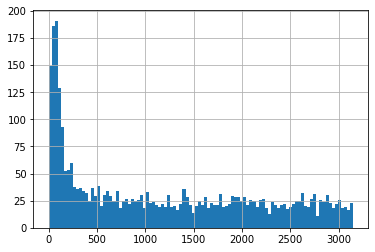

In [51]:
import sys
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_all = pd.read_csv('D:/Workspaces/novammp/datas/cn.com.vau_in-app-events_2022-08-08_2022-08-15_Australia_Sydney.csv', low_memory=False)
col_select_list = ['Advertising ID','Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name', 'Adset ID', 'Ad',
                       'Media Source', 'Site ID', 'State', 'City', 'Postal Code', 'IP', 'Operator',
                       'Carrier', 'Language', 'Device Category', 'Platform', 'OS Version', 'App Version', 'SDK Version',
                       'Attribution Lookback', 'Match Type', 'Original URL', 'Device Model']
df_all = df_all[col_select_list].copy()
df1 = df_all.drop_duplicates(subset=['Advertising ID'], keep='last').copy()
df1['TouchTime'] = pd.to_datetime(df1['Attributed Touch Time'])
df1['InstallTime'] = pd.to_datetime(df1['Install Time'])
df1['TimeSecDiff'] = (df1['InstallTime'] - df1['TouchTime']).astype('timedelta64[s]')
# df1['TimeSecDiff_60'] = (df1['TimeSecDiff']/60).astype('int')
# df_res = df1[['TimeSecDiff_60','Advertising ID']].groupby(['TimeSecDiff_60'], as_index=False).count().sort_values(by='TimeSecDiff_60')

df1['TimeSecDiff'] = df1['TimeSecDiff'].astype('int')
print(df1.describe())
print(len(df1))
df_res = df1[['TimeSecDiff','Advertising ID']].copy().groupby(['TimeSecDiff'], as_index=False).count().sort_values(by='TimeSecDiff')
df_res['prob'] = df_res['Advertising ID']*1.0/len(df1)
print(len(df_res))
# print(df_res[['TimeSecDiff', 'prob']].head(40))
# print(df_res[['TimeSecDiff', 'prob']].head(3000).sum())

pdf_value = df_res['prob']
cdf_value = np.cumsum(pdf_value)
# print(cdf_value)

import random
def cast_rand(cdf_value):
    r = random.random()
    res = 0
    for num in range(0,cdf_value.size):
        if num == 0:
            if r <= cdf_value[num]:
                res = 0
        else:
            if r > cdf_value[num - 1] and r <= cdf_value[num]:
                res = num
                break;
    return res

# for num in range(0,100):
#     print(cast_rand(cdf_value))

for i in range(len(df_res)):
    df_res.loc[i, 'test'] = cast_rand(cdf_value)
# print(df_res['test'] )
df_res['test'].hist(bins=100)
plt.show()

[0.45146928 0.55387355 0.60952805 0.65271594 0.68967053 0.71838825
 0.74577026 0.76268923 0.77582369 0.78806768 0.80186999 0.809439
 0.81945681 0.82613535 0.83748887 0.84706144 0.85485307 0.8601959
 0.86553874 0.86932324 0.87711487 0.88023152 0.88512912 0.88891362
 0.89381122 0.900935   0.90672306 0.91362422 0.91918967 0.92520036
 0.92876224 0.93365984 0.93766696 0.94122885 0.94367765 0.94612645
 0.94857524 0.95035619 0.95102404 0.95235975 0.95325022 0.95391808
 0.95480855 0.95614426 0.95703473 0.95903829 0.95992876 0.96193232
 0.96326803 0.9641585  0.96482636 0.9666073  0.96816563 0.96972395
 0.97195013 0.97417631 0.97551202 0.97707035 0.97818344 0.98063224
 0.98152271 0.98308103 0.98374889 0.98463936 0.98508459 0.98508459
 0.9864203  0.98731077 0.98842386 0.98953695 0.98975957 0.98975957
 0.99042743 0.99065004 0.99154052 0.99220837 0.99332146 0.99332146
 0.9937667  0.99443455 0.99465717 0.99532502 0.99577026 0.99666073
 0.99732858 0.9975512  0.99777382 0.99777382 0.99799644 0.9979964

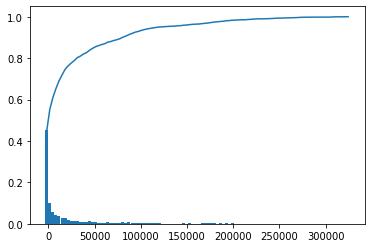

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


# 构造数据
# data = df1['TimeSecDiff_60']
data = df1['TimeSecDiff']
res_freq = stats.relfreq(data, numbins=100)
# 计算结果
pdf_value = res_freq.frequency
cdf_value = np.cumsum(res_freq.frequency)
print(cdf_value)
# 绘图
x = res_freq.lowerlimit + np.linspace(0, res_freq.binsize * res_freq.frequency.size, res_freq.frequency.size)
plt.bar(x, pdf_value, width=res_freq.binsize)
plt.plot(x, cdf_value)